# Methods Optimisation Realisation

## Methods of first order

### SimpleGradientDescent

First task

---------------Gradient descent-------------------


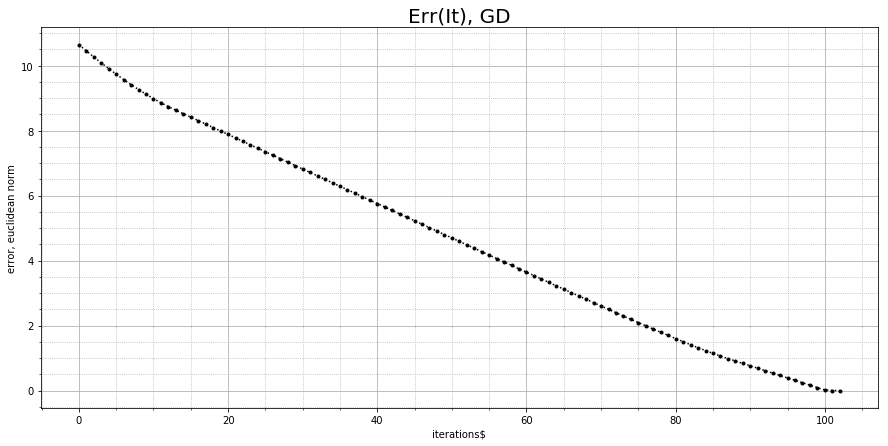

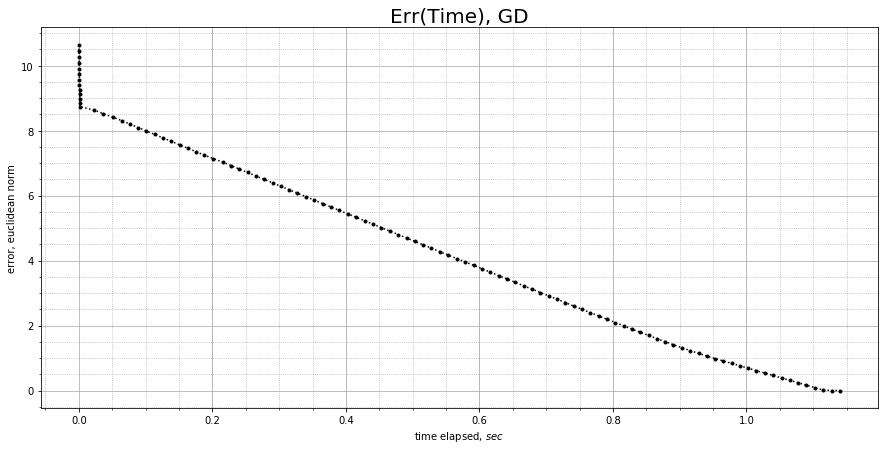

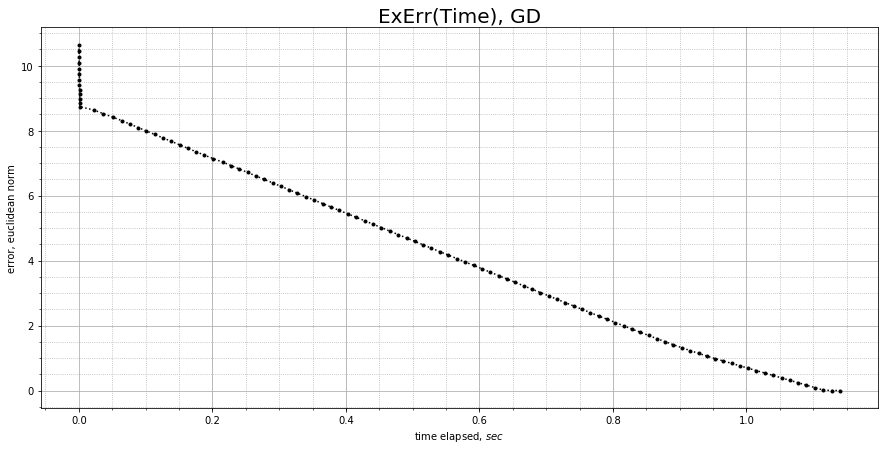

-----------------Internal point--------------------


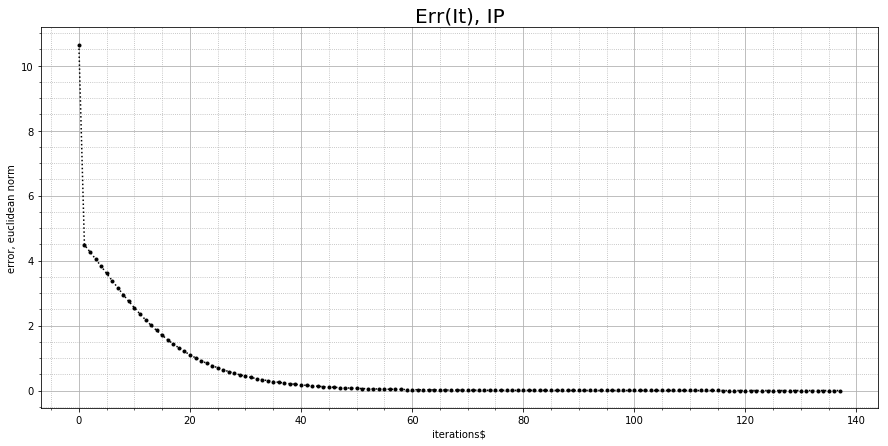

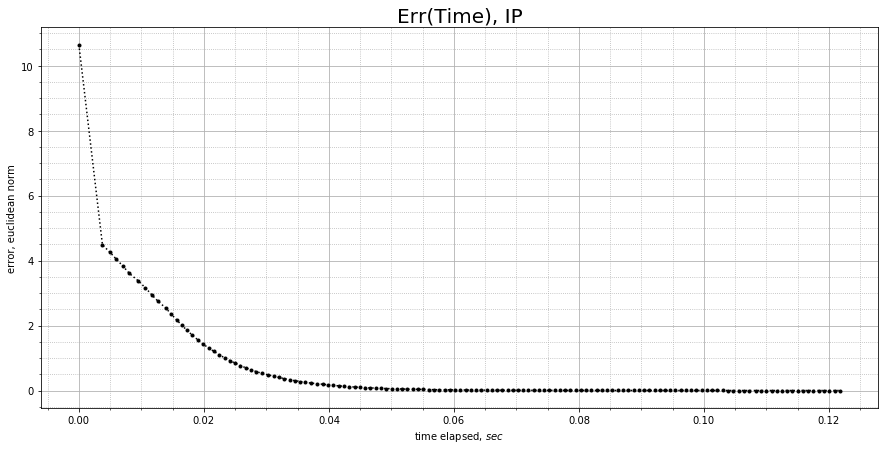

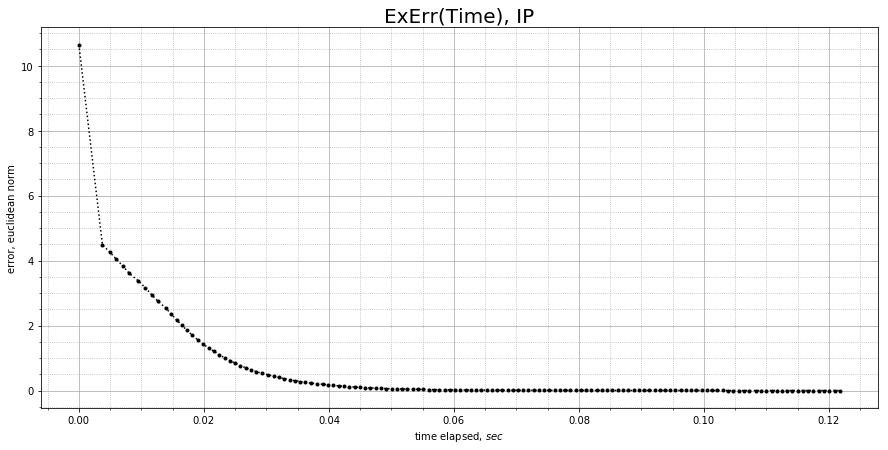

------------------Nesterov--------------------------
[1. 0. 0.]
proj [1. 0. 0.]
[ 1.5  -0.75 -0.75]
proj [ 1.5  -0.75 -0.75]
[ 3.1  -1.05 -1.05]
proj [ 3.1  -1.05 -1.05]
[ 5.15  -1.575 -1.575]
proj [ 4.70937932 -1.73270681 -1.63311959]
[ 8.23571429 -2.04642857 -2.04642857]
proj [ 5.29798334 -3.16183998 -2.21755384]
[12.44553571 -2.66919643 -2.66919643]
proj [ 6.08794277 -5.15217256 -2.80571128]
[18.60297331 -3.29352284 -3.35991432]
proj [ 6.94186636 -7.30366524 -3.44149268]
[28.91646629 -3.38570085 -4.15956666]
proj [ 6.94186636 -7.30366524 -3.44149268]


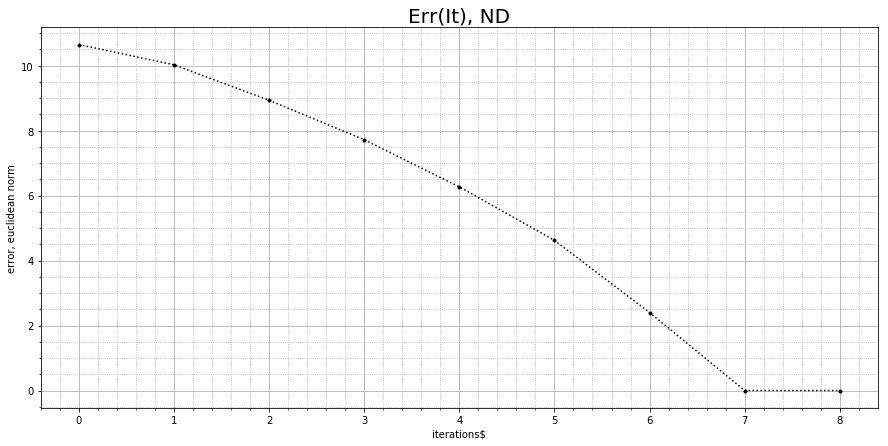

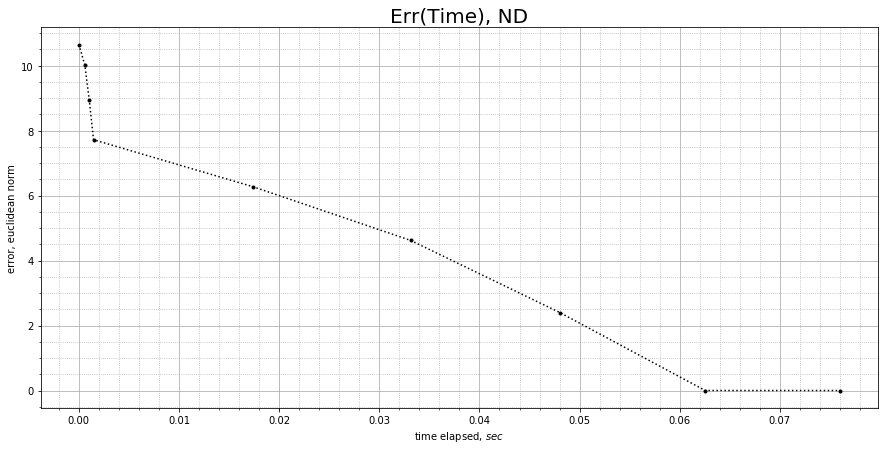

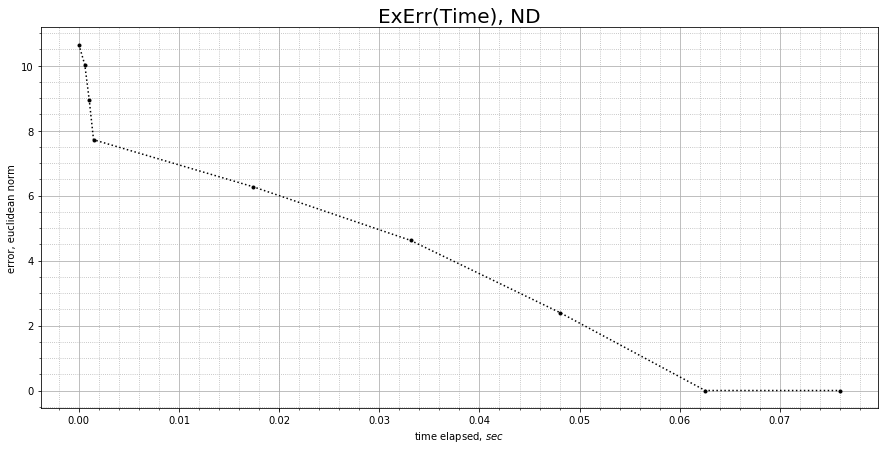

In [2]:
import numpy as np
from opt_project import task_1
import opt_project.methods.gradient_descent as gd
import opt_project.methods.internal_point as ip
import opt_project.methods.nesterov as nst

# task_1 initialisation
a = np.array([1., 0., 0.])
b = np.array([1,])
F = np.array([
    [76.3402909013, 27.3236913435, 10.0695823542],
    [-27.5962812192, -62.9012921655, 17.7348207564],
    [-26.2012001069, 19.1239055741, 58.1525657745],
    [-22.5428095751, 16.4536952479, -85.9569688851]
])
g = np.array([
    295.7266088536,
    206.8060288566,
    22.2680415867,
    19.1588255138
])

oracle = task_1.first_order_oracle(a, b)
oracle_2 = task_1.second_order_oracle(a, b)
constraints = task_1.constraints(F, g)

print("---------------Gradient descent-------------------")

# gradient descent solver initialisation
criteria = gd.stop_criterias.ydiff_stop_crit(0.0001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = gd.step_sizes.ConstantStepSize(alpha = 0.3)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), GD")

print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), IP")

print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = nst.step_sizes.ConstantStepSize(alpha = 1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), ND")




Second task

---------------Gradient descent-------------------


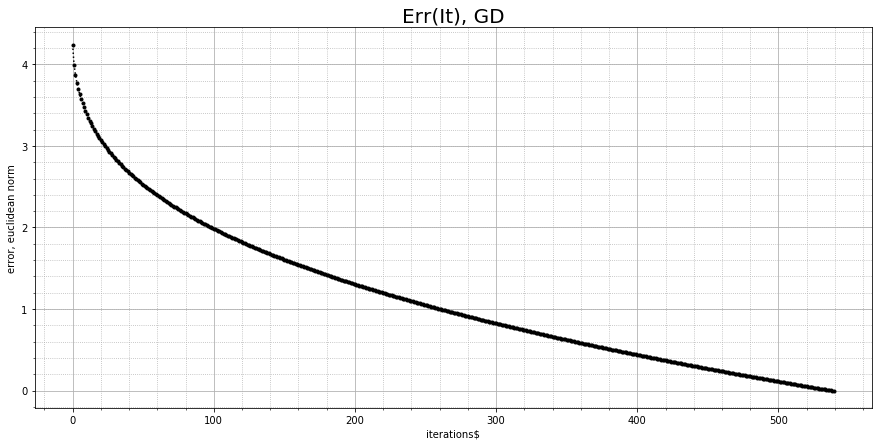

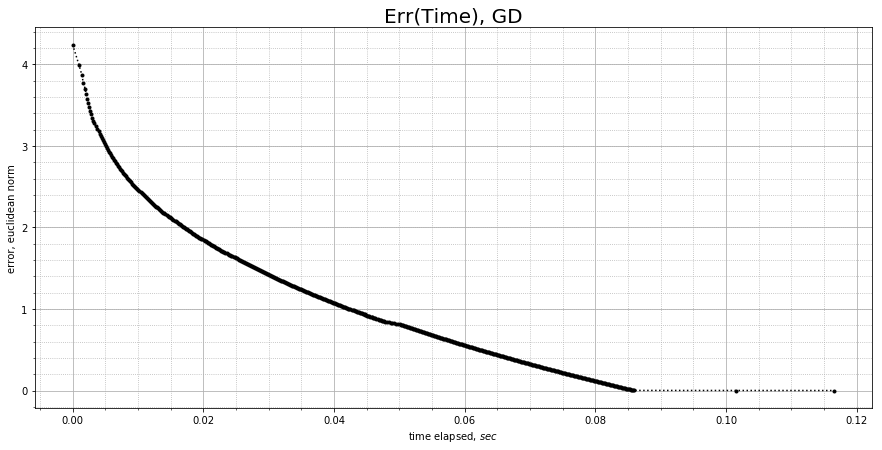

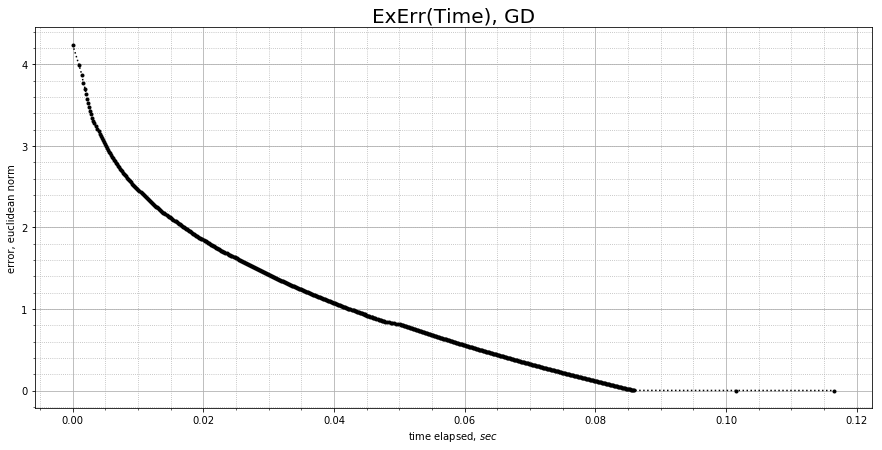

-----------------Internal point--------------------


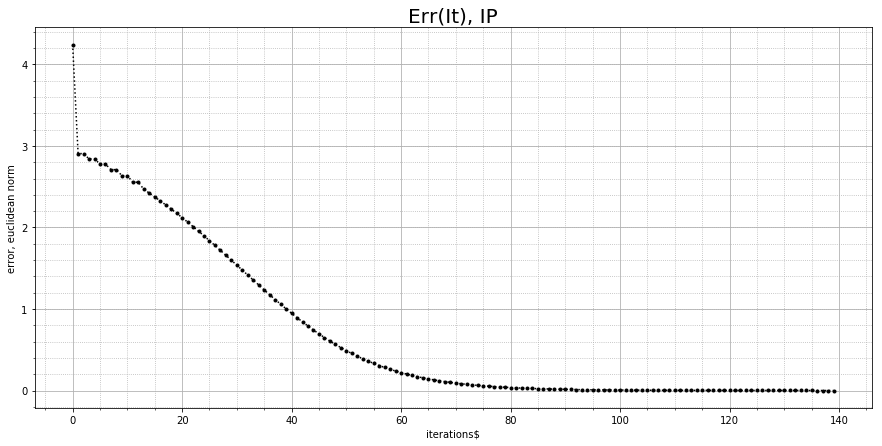

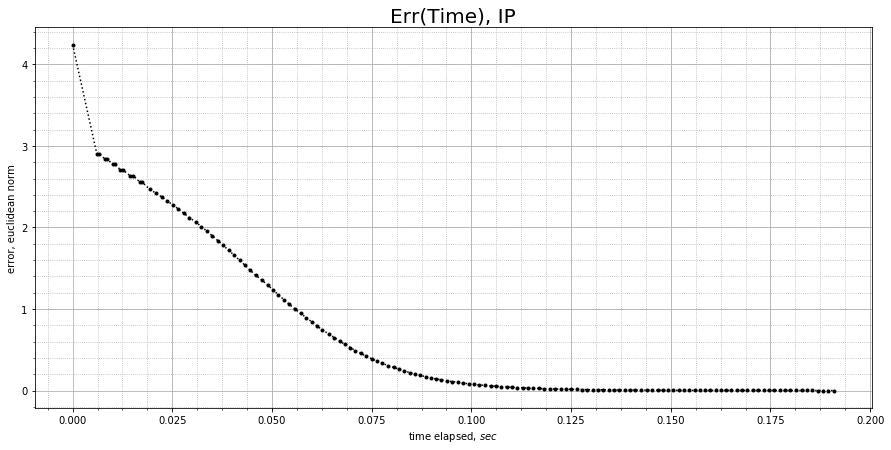

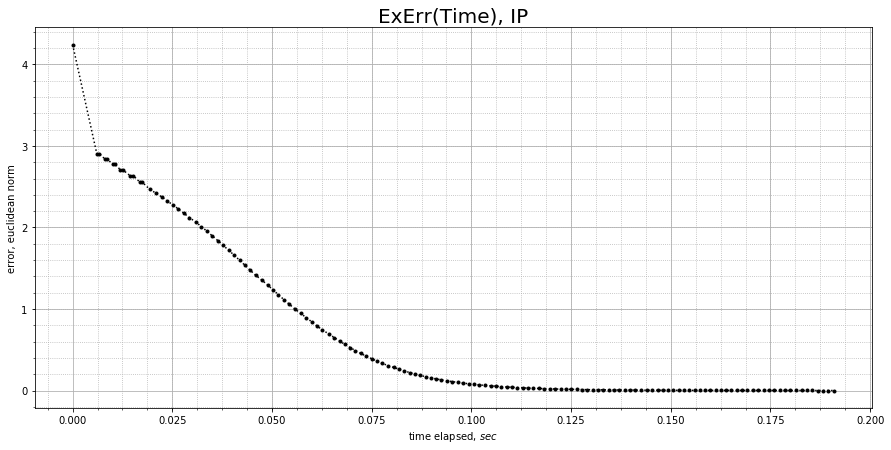

------------------Nesterov--------------------------


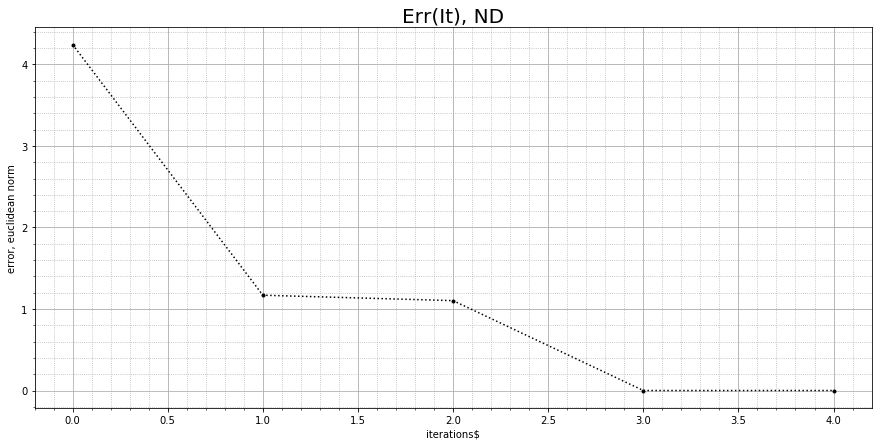

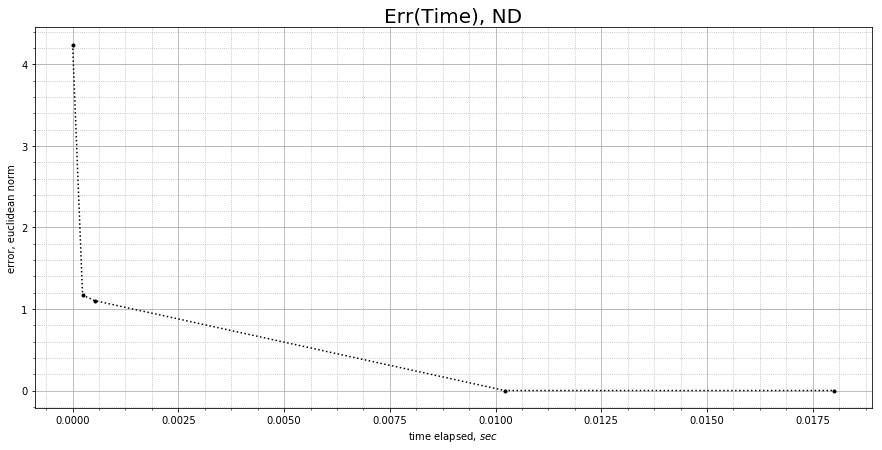

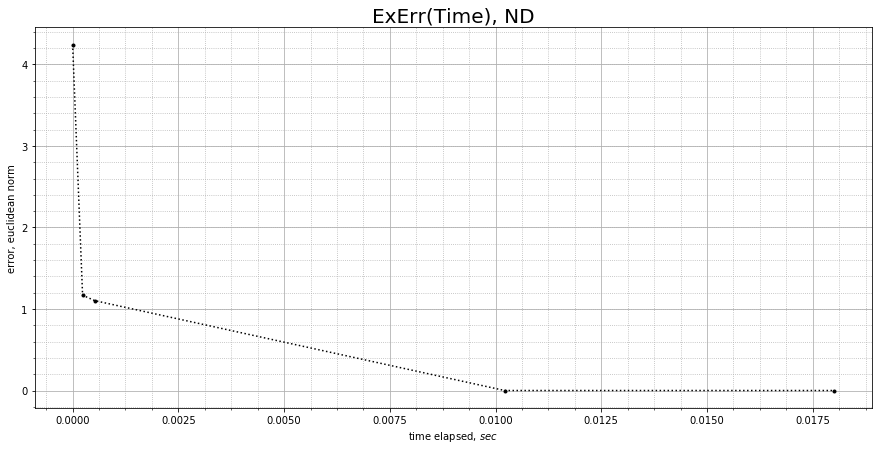

In [3]:
import numpy as np
import opt_project.methods.gradient_descent as gd
import opt_project.methods.internal_point as ip
import opt_project.methods.nesterov as nst
from opt_project import task_2

# task 2 initialisation
F = np.array([
    [-1, 1],
    [1, -1],
    [0, 1],
    [1, 0]
])
g = np.array([1, 1, 3, 3])
a = np.array([1, 1])
b = 1
c = np.array([1, 1])
d = 1

oracle = task_2.first_order_oracle(a, b, c, d)
oracle_2 = task_2.second_order_oracle(a, b, c, d)
constraints = task_2.constraints(F, g, c, d)

print("---------------Gradient descent-------------------")
# gradient descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = gd.stop_criterias.ydiff_stop_crit(0.00001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
stp_size = gd.step_sizes.ArmijoStepSize(oracle, constraints, init_alpha = 0.1)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), GD")

print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), IP")

print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(init_point)
stp_size = nst.step_sizes.ConstantStepSize(alpha=0.1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), ND")
